In [43]:
import pandas as pd

In [44]:
data = pd.read_excel('excel/DATA_KNN_2000x2000.xlsx',sheet_name='DATA_KNN')
# data = pd.read_excel('excel/DATA_KNN_1500x1500.xlsx')
# data = pd.read_excel('excel/DATA_KNN_3000x1800.xlsx')
x = data[['BPM','HRV','VAR','STD','SISTOL','DIASTOL','DISTANCE']]
# x = data[['BPM','HRV']]

y = data['KECEMASAN']

In [45]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
x_minmax = minmax.fit_transform(x)

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_minmax, y, test_size= 0.2, random_state= 0)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
k = 7
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train,y_train)

accuracy = model.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7333333333333333


In [49]:
y_pred = model.predict(x_test)


In [50]:
from sklearn.metrics import confusion_matrix, classification_report


In [51]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
matrixknn = classification_report(y_test, y_pred)
print(matrixknn)

              precision    recall  f1-score   support

      normal       0.73      0.79      0.76        14
       parah       0.60      0.69      0.64        13
      ringan       0.73      1.00      0.85        11
sangat parah       0.83      1.00      0.91         5
      sedang       0.89      0.47      0.62        17

    accuracy                           0.73        60
   macro avg       0.76      0.79      0.75        60
weighted avg       0.76      0.73      0.72        60



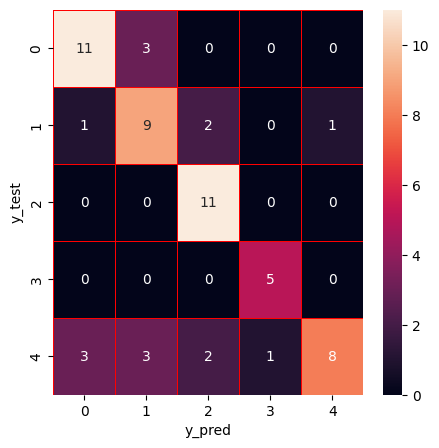

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()


## BURAM

In [53]:
# acc = []
# for i in range(1,51):
#     k = i
#     model = KNeighborsClassifier(n_neighbors=k)
#     model.fit(x_train,y_train)

#     accuracy = model.score(x_test, y_test)
#     # print("Accuracy:", accuracy)
#     acc.append(accuracy)

# pd.DataFrame(acc).max()

In [54]:
from sklearn.metrics import r2_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

param_grid = {'n_neighbors' : np.arange(1,51)}
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv = 5,scoring = 'accuracy')
grid.fit(x_train,y_train)
grid.best_params_

{'n_neighbors': 1}